In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
data = pd.read_csv("StudentsPerformance.csv")

In [5]:
data = pd.DataFrame(data)
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


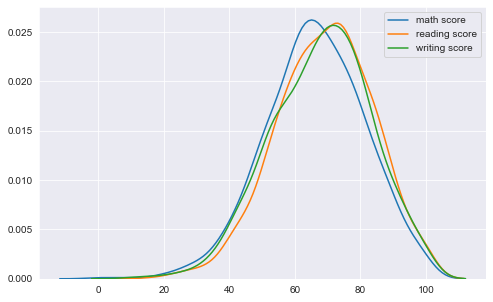

In [6]:
plt.rcParams['figure.figsize'] = (8,5)
sns.kdeplot(data["math score"])
sns.kdeplot(data["reading score"])
sns.kdeplot(data["writing score"])
plt.show()

In [7]:
# Let' create a new feature called total score 
data["tot_score"] = data["math score"]+data["reading score"]+data["writing score"]

In [8]:
num_col = data.select_dtypes(exclude = object).columns
data[num_col].describe()

,math score,reading score,writing score,tot_score
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000
std,15.16308,14.600192,15.195657,42.771978
min,0.00000,17.000000,10.000000,27.000000
25%,57.00000,59.000000,57.750000,175.000000
50%,66.00000,70.000000,69.000000,205.000000
75%,77.00000,79.000000,79.000000,233.000000
max,100.00000,100.000000,100.000000,300.000000


In [9]:
cat_col = data.select_dtypes(include = object).columns

In [10]:
data[cat_col]

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none
...,...,...,...,...,...
995,female,group E,master's degree,standard,completed
996,male,group C,high school,free/reduced,none
997,female,group C,high school,free/reduced,completed
998,female,group D,some college,standard,completed


In [11]:
for i in cat_col:
    print(i," \n")
    print(data[i].value_counts())
    print("==="*15)

gender  

female    518
male      482
Name: gender, dtype: int64
race/ethnicity  

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64
parental level of education  

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64
lunch  

standard        645
free/reduced    355
Name: lunch, dtype: int64
test preparation course  

none         642
completed    358
Name: test preparation course, dtype: int64


In [12]:
# let's assign grade Based up on average score's obtained by .. (math,reading,writing)//3
data["grades"]  = [0]*data.shape[0]

In [13]:
for i in range(len(data["tot_score"])):
    if((data["tot_score"][i]//3)>79):
        data["grades"][i] = "A"
    elif((data["tot_score"][i]//3)>59 and (data["tot_score"][i]//3) <80 ):
        data["grades"][i] = "B"
    elif((data["tot_score"][i]//3)>35 and (data["tot_score"][i]//3) <60 ):
        data["grades"][i] = "C" 
    else:
        data["grades"][i] = "D"
        
        

grades counts :
 B    517
C    267
A    198
D     18
Name: grades, dtype: int64


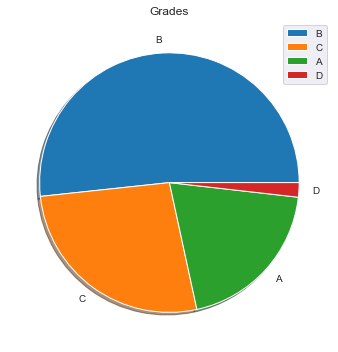

In [14]:
grades = data.grades.value_counts()
print("grades counts :\n",grades)
plt.rcParams['figure.figsize'] = (8,5)
plt.pie(grades.values,labels = grades.index,shadow  = True,explode = [0.0001,0.0001,0.0001,0.0001])
plt.legend(["B","C","A","D"])
plt.title("Grades")
plt.tight_layout()
plt.show()

# Note :  Most of the Students are Having B Grade . 

# let's do some bivariate analysis

Text(0, 0.5, 'Mean Different Test Scores : ')

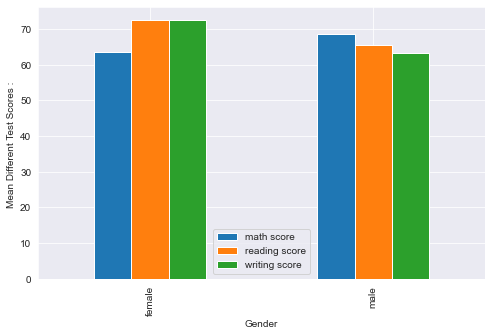

In [15]:
# gender v/s different test score's 

# note : male's   are good at Math
# note : female's are good at reading and writing 

data.pivot_table(index = "gender",values = ["math score","reading score","writing score"]).plot(kind = 'bar')
plt.xlabel("Gender")
plt.ylabel("Mean Different Test Scores : ")

Text(0, 0.5, 'Mean Different Test Scores : ')

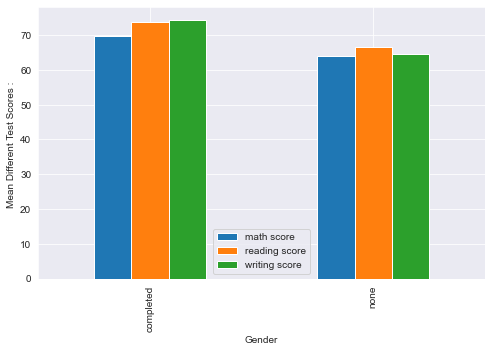

In [16]:
data.pivot_table(index = "test preparation course",values = ["math score","reading score","writing score"]).plot(kind = 'bar')
plt.xlabel("Gender")
plt.ylabel("Mean Different Test Scores : ")

# Note : Student's who are completed test preparation course are good at all three test score's compared to students who are not done test preparation


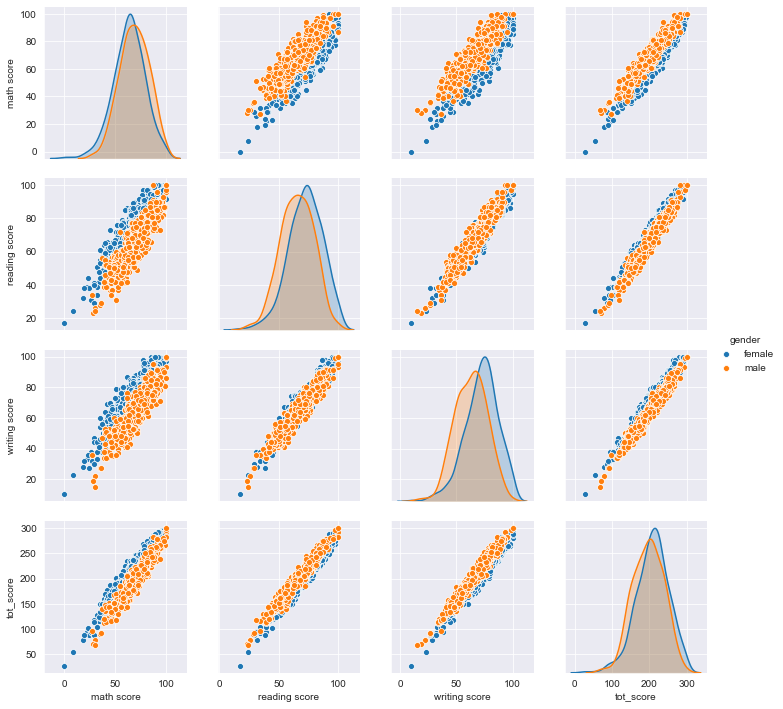

In [17]:
# let's see how gender affects different test score's
# This shows Regression task, we can see the linear relationship among the featues.
sns.pairplot(data,hue = "gender")

In [18]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'tot_score', 'grades'],
      dtype='object')

# Let's see  the cause for   Student Being  a topper .

In [19]:

topper = data[(data["math score"] >80) & (data["reading score"] >80) & (data["writing score"] >80)]
topper.shape

(110, 10)

In [20]:
topper

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,tot_score,grades
2,female,group B,master's degree,standard,none,90,95,93,278,A
6,female,group B,some college,standard,completed,88,95,92,275,A
16,male,group C,high school,standard,none,88,89,86,263,A
34,male,group E,some college,standard,none,97,87,82,266,A
49,male,group C,high school,standard,completed,82,84,82,248,A
...,...,...,...,...,...,...,...,...,...,...
957,female,group D,master's degree,standard,none,92,100,100,292,A
962,female,group E,associate's degree,standard,none,100,100,100,300,A
970,female,group D,bachelor's degree,standard,none,89,100,100,289,A
979,female,group C,associate's degree,standard,none,91,95,94,280,A


# Which Gender Got Highest Toppers count ?
# Ans : Female's are Most Toppers ! 

female    65
male      45
Name: gender, dtype: int64


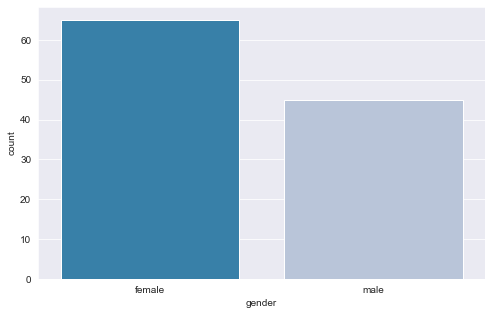

In [21]:
print(topper["gender"].value_counts())
sns.countplot(topper["gender"],palette="PuBu_r")
plt.show()


# let"s see how parental level education affects Being Topper 

associate's degree    33
some college          27
bachelor's degree     19
master's degree       16
high school            8
some high school       7
Name: parental level of education, dtype: int64


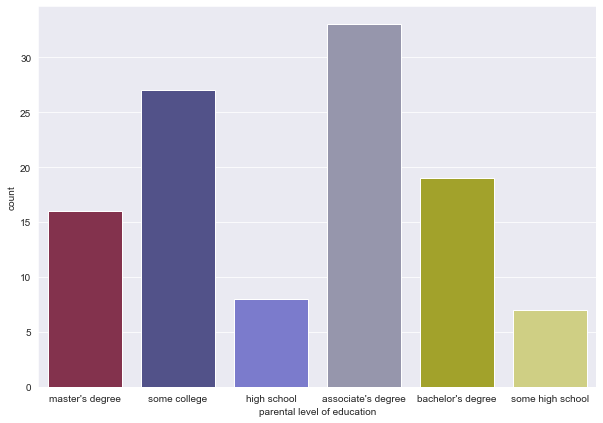

In [22]:

plt.rcParams['figure.figsize'] = (10,7)
print(topper["parental level of education"].value_counts())
sns.countplot(topper["parental level of education"],palette="gist_stern")
plt.show()

# let"s see how test preparation course feature affects Being Topper

completed    61
none         49
Name: test preparation course, dtype: int64


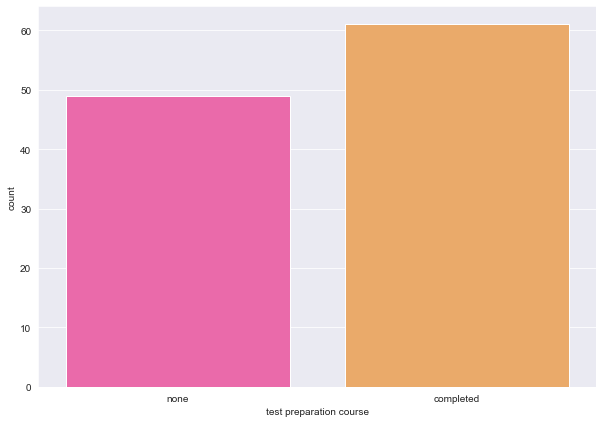

In [23]:
 plt.rcParams['figure.figsize'] = (10,7)
print(topper["test preparation course"].value_counts())
sns.countplot(topper["test preparation course"],palette="spring")
plt.show()

# let"s see how race/ethnicity course feature affects Being Topper 

group C    34
group E    29
group D    26
group B    14
group A     7
Name: race/ethnicity, dtype: int64


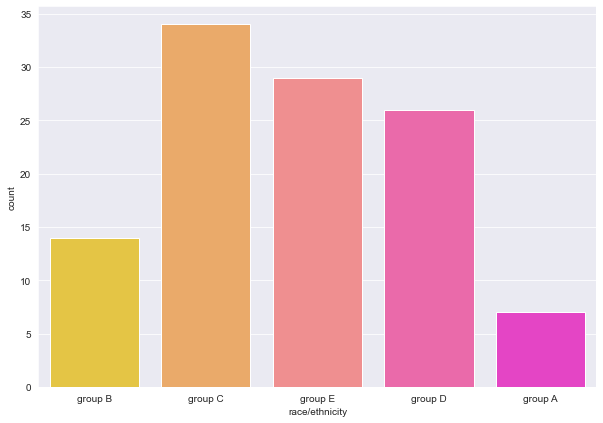

In [24]:
plt.rcParams['figure.figsize'] = (10,7)
print(topper["race/ethnicity"].value_counts())
sns.countplot(topper["race/ethnicity"],palette="spring_r")
plt.show()

# Most of The Topper Student's are having Standard lunch

standard        99
free/reduced    11
Name: lunch, dtype: int64


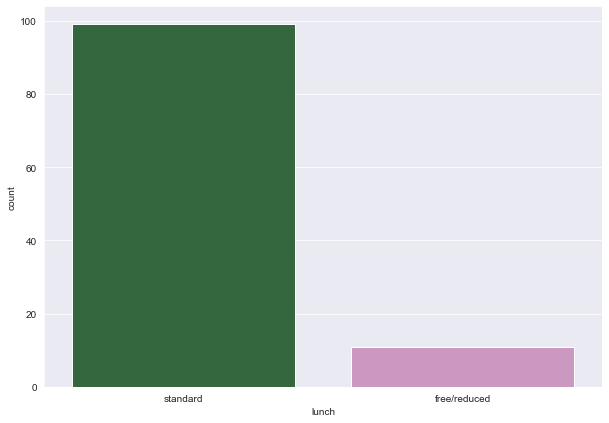

In [25]:
# let"s see how lunch  feature affects Being Topper 
plt.rcParams['figure.figsize'] = (10,7)
print(topper["lunch"].value_counts())
sns.countplot(topper["lunch"],palette="cubehelix")
plt.show()

# Let's see the cause Behind ,student's having Very less score 

In [26]:
low_scorrer = data[(data["math score"] <35) & (data["reading score"] <35) & (data["writing score"] <35)]
low_scorrer.shape

(8, 10)

In [27]:
low_scorrer

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,tot_score,grades
17,female,group B,some high school,free/reduced,none,18,32,28,78,D
59,female,group C,some high school,free/reduced,none,0,17,10,27,D
76,male,group E,some high school,standard,none,30,26,22,78,D
327,male,group A,some college,free/reduced,none,28,23,19,70,D
363,female,group D,some high school,free/reduced,none,27,34,32,93,D
596,male,group B,high school,free/reduced,none,30,24,15,69,D
601,female,group C,high school,standard,none,29,29,30,88,D
980,female,group B,high school,free/reduced,none,8,24,23,55,D


# let"s see how parental level education affects Being low_scorrer 
Insight :  Neither of the Student Parent's  are from Education level Master's, bachelor's , associate degree's

some high school    4
high school         3
some college        1
Name: parental level of education, dtype: int64


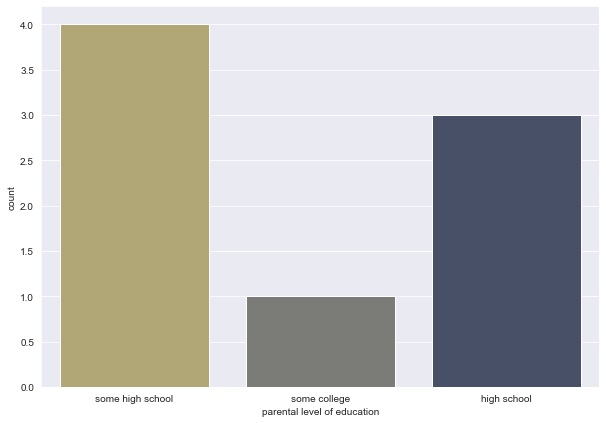

In [28]:
plt.rcParams['figure.figsize'] = (10,7)
print(low_scorrer["parental level of education"].value_counts())
sns.countplot(low_scorrer["parental level of education"],palette="cividis_r")
plt.show()

# let"s see how lunch  feature affects Being Low_Scrorrer

free/reduced    6
standard        2
Name: lunch, dtype: int64


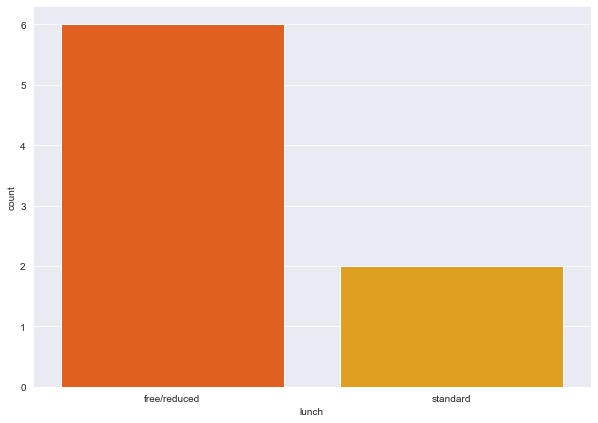

In [29]:

plt.rcParams['figure.figsize'] = (10,7)
print(low_scorrer["lunch"].value_counts())
sns.countplot(low_scorrer["lunch"],palette="autumn")
plt.show()

In [30]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'tot_score', 'grades'],
      dtype='object')

# Let's See how test preparation course affects being low_scroccer 

##### This show's the reason Behind being Low scorrer , I.e student's who are not took test preparation course  ended up having very test's less score !

In [31]:
print(low_scorrer["test preparation course"].value_counts())

none    8
Name: test preparation course, dtype: int64


# Let's See overall Passed and Failed Percentage Of Student's in all three test's 
# Note : I have Considered Student's With "D" Grades as Failed Once's and Student's With A or B or C Grade's  as Passed Onces .

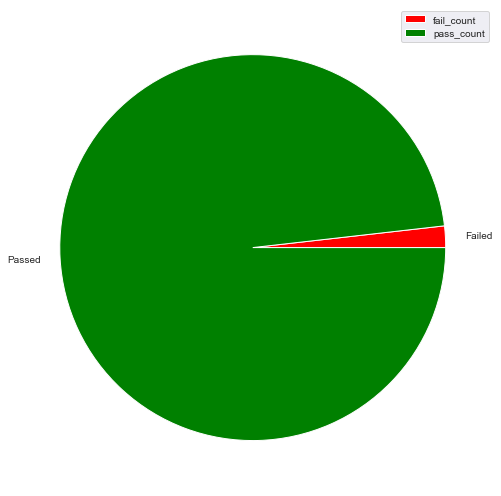

In [32]:
fail_count = data[data["grades"]=="D"]["grades"].count()
pass_count = data[data["grades"]!="D"]["grades"].count()
labels     = ["Failed","Passed"]
plt.pie([fail_count,pass_count],labels = labels,colors = ["red","green"])
plt.legend(["fail_count","pass_count"])
plt.tight_layout()
plt.show()

In [33]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,tot_score,grades
0,female,group B,bachelor's degree,standard,none,72,72,74,218,B
1,female,group C,some college,standard,completed,69,90,88,247,A
2,female,group B,master's degree,standard,none,90,95,93,278,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,C
4,male,group C,some college,standard,none,76,78,75,229,B


# Let's Build a Regression Model First In order to Predict Total Score Obtained by Student Based on Given Features.

In [51]:
data["tot_score"] = data["tot_score"].astype(int) 

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error


In [124]:
scopy = data.copy()
c2 = data.copy()

In [54]:
scopy =pd.get_dummies(scopy,drop_first = True)
scopy.shape

(1000, 19)

In [55]:
x = scopy.drop("tot_score",axis = 1)
y = scopy["tot_score"]

In [56]:
lr = LinearRegression()
xtrain,xtest,ytrain,ytest  = train_test_split(x,y,test_size = 0.3,random_state = 33)
lr.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
print("Train set Perfomance :  ")
n = len(xtrain)
k = xtrain.shape[1]
y_pred_train = lr.predict(xtrain)
r2 = r2_score(y_pred_train,ytrain)
adjusted_r2_score = (1- (((1 - r2)*(n-1))/(n-k-1)))
print("r2_score value : ",r2)
print("adjusted_r2_score value : ",adjusted_r2_score)
print("MSE Value : ",mean_squared_error(y_pred_train,ytrain))

Train set Perfomance :  
r2_score value :  1.0
adjusted_r2_score value :  1.0
MSE Value :  3.875966632829913e-28


In [58]:
print("Test set Perfomance :  ")
n = len(xtest)
k = xtest.shape[1]
y_pred_test = lr.predict(xtest)
r2 = r2_score(y_pred_test,ytest)
adjusted_r2_score = (1- (((1 - r2)*(n-1))/(n-k-1)))
print("r2_score value : ",r2)
print("adjusted_r2_score value : ",adjusted_r2_score)
print("MSE Value : ",mean_squared_error(y_pred_test,ytest))

Test set Perfomance :  
r2_score value :  1.0
adjusted_r2_score value :  1.0
MSE Value :  3.897603960515975e-28


In [103]:
res  = pd.DataFrame(ytest,dtype = int)
res.rename(columns = {"tot_score":"actual"},inplace = True)
res["predicted"] = y_pred_test
res["predicted"] =  res["predicted"].astype(int)

In [104]:
res.head()

,actual,predicted
286,267,267
402,169,169
253,232,232
4,229,229
372,220,220


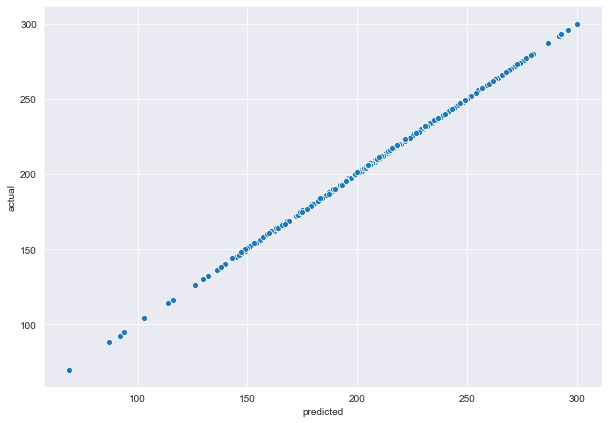

In [105]:
# Let's see the result Visually .

sns.scatterplot(res["predicted"],res["actual"])